Case Study for random forest

In [ ]:
# in this case study we are going to predict whether a customer deafaults or not.
# credit default is one of the most important problems in banking and risk analytics industry 



In [6]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [7]:
# reading the csv files and puttning it into df 

df = pd.read_csv(r'C:\Users\devth\Documents\VScode_files\Machine learning\RF_casestu_data\credit-card-default.csv')
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [8]:
# looking into the type of colomns 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In [9]:
# Data preparation and model building 

from sklearn.model_selection import train_test_split

In [10]:
# Putting the features into X 

X = df.drop(['defaulted'], axis=1)

Y = df['defaulted']

# splitting the data into train and test

x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.3, random_state=101)


In [11]:
# lets first fir the data inito default hyperparameters 
# importing random forest classifier

from sklearn.ensemble import RandomForestClassifier
# running the  random forest with default classifying parameters 
rfc = RandomForestClassifier()

In [12]:
# fit 

rfc.fit(x_train,y_train)


RandomForestClassifier()

In [13]:
# making predictions 

predictions = rfc.predict(x_test)


In [15]:
# importing classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [16]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7058
           1       0.65      0.36      0.46      1942

    accuracy                           0.82      9000
   macro avg       0.74      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000



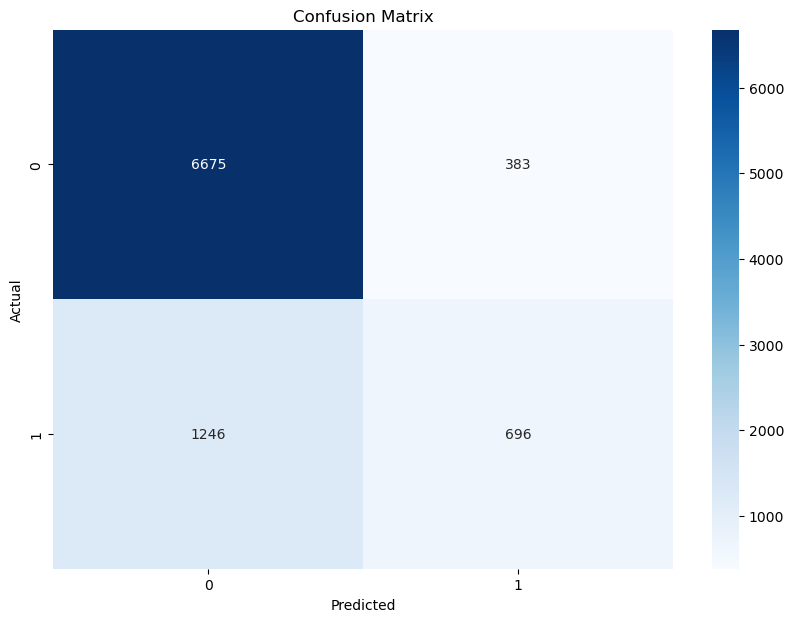

In [17]:
# making a visualization of the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# confusion matrix
cm = confusion_matrix(y_test, predictions)

# plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [18]:
# printing accuracy 
print('Accuracy:', accuracy_score(y_test, predictions))

Accuracy: 0.819


In [19]:
# hyper parameter tuning 
# check the notes for the hyper parameter notes 

# tuning the max_depth 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

# specify the number of folds 
n_folds = 5
# parameters to build the model on 
parameters = {'max_depth' :range(2,20,5)}

# instantiate the model 
rf = RandomForestClassifier()

# fit tree on the training data 
rf = GridSearchCV(rf, parameters, cv=n_folds, scoring='accuracy')
rf.fit(x_train,y_train)



GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(2, 20, 5)}, scoring='accuracy')

In [22]:
# scores of grid search

scores = rf.cv_results_
pd.DataFrame(scores)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.837084,0.034038,0.016633,0.001236,2,{'max_depth': 2},0.797143,0.800000,0.799524,0.797143,0.795000,0.797762,0.001817,4
1,2.096051,0.034076,0.031826,0.001183,7,{'max_depth': 7},0.818095,0.820000,0.814524,0.815476,0.816905,0.817000,0.001932,2
2,3.407476,0.102966,0.055568,0.006135,12,{'max_depth': 12},0.814762,0.819286,0.819286,0.808095,0.818333,0.815952,0.004267,3
3,4.253429,0.050196,0.067115,0.002616,17,{'max_depth': 17},0.819286,0.817857,0.821190,0.811429,0.817619,0.817476,0.003281,1


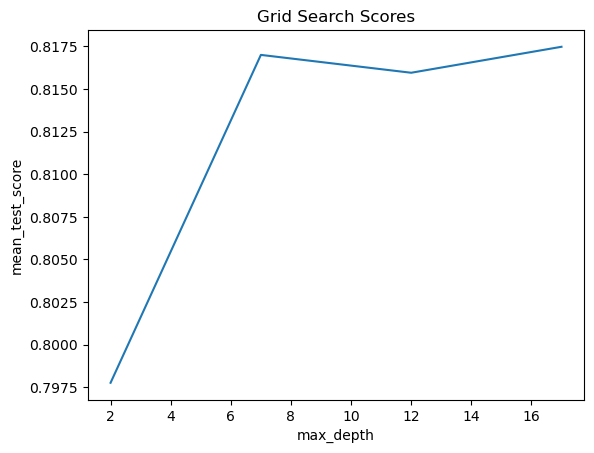

In [27]:
# plotting the scores
plt.figure()
#plt.plot(scores['param_max_depth'], scores['mean_train_score'])
plt.plot(scores['param_max_depth'], scores['mean_test_score'])
plt.xlabel('max_depth')
plt.ylabel('mean_test_score')
plt.title('Grid Search Scores')
plt.show()


In [30]:
# tuning n estimators 

# gridsearch to find the optimal n_estimators 

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

n_folds = 5

parameters = {'n_estimators' : range(100,1500,400)}

rf = RandomForestClassifier(max_depth=4)
rf = GridSearchCV(rf, parameters, cv=n_folds, scoring='accuracy') 

rf.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=4),
             param_grid={'n_estimators': range(100, 1500, 400)},
             scoring='accuracy')

In [ ]:
# scores of grid search
scores = rf.cv_results_
pd.DataFrame(scores)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.346814,0.009916,0.023231,0.000922,100,{'n_estimators': 100},0.811190,0.814762,0.811190,0.805714,0.806429,0.809857,0.003362,2
1,6.636570,0.131827,0.101892,0.003146,500,{'n_estimators': 500},0.812381,0.813810,0.811667,0.804762,0.806667,0.809857,0.003504,2
2,11.687779,0.210364,0.180845,0.001503,900,{'n_estimators': 900},0.811905,0.814524,0.810952,0.804762,0.807857,0.810000,0.003377,1
3,17.310157,0.332377,0.265258,0.009025,1300,{'n_estimators': 1300},0.811429,0.813571,0.810952,0.805238,0.806190,0.809476,0.003210,4


Text(0, 0.5, 'mean_test_score')

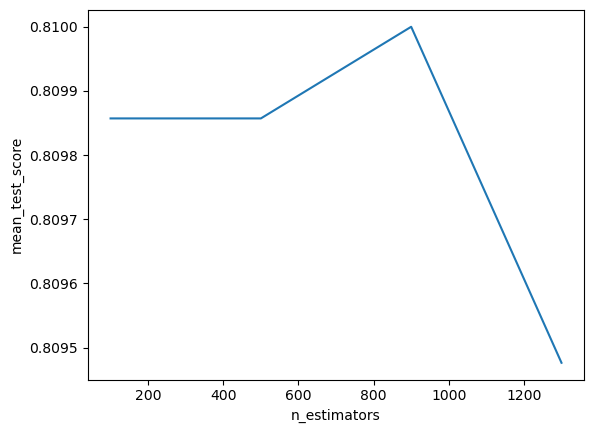

In [33]:
# plotting the accuracies with n_estimators
plt.figure()
plt.plot(scores['param_n_estimators'], scores['mean_test_score'])
plt.xlabel('n_estimators')
plt.ylabel('mean_test_score')

In [34]:
# tuning max features 

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

n_folds = 5

parameters = {'max_features' : [4,8,14,20,24]}

rf = RandomForestClassifier()

rf = GridSearchCV(rf, parameters, cv=n_folds, scoring='accuracy')

rf.fit(x_train,y_train)


KeyboardInterrupt: 

In [ ]:
# checking the scores 

scores = rf.cv_results_
pd.DataFrame(scores)

In [ ]:
# plotting the scores 

plt.figure()
plt.plot(scores['param_max_features'], scores['mean_test_score'])
plt.xlabel('max_features')
plt.ylabel('mean_test_score')
plt.title('Grid Search Scores')
plt.show()


In [ ]:
# tuning minimum samples leaves 

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

n_folds = 5

parameters = {'min_samples_leaf' : [100,400,50]}

rf = RandomForestClassifier()
rf = GridSearchCV(rf, parameters, cv=n_folds, scoring='accuracy')
rf.fit(x_train,y_train)



In [ ]:
# checking the scores 

scores = rf.cv_results_
pd.DataFrame(scores)

In [ ]:
# plotting the scores 

plt.figure()
plt.plot(scores['param_max_features'], scores['mean_test_score'])
plt.xlabel('max_features')
plt.ylabel('mean_test_score')
plt.title('Grid Search Scores')
plt.show()


In [35]:
# grid search to find optimal hyper parameters 

# creating the parameter grid based on the results of the random search 

param_grid = {
    'max_depth': [4, 8, 10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100, 200, 300],
    'max_features': [5,10]
}

# create the based model 

rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1)

In [36]:
# fit the grid search to the data

grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 10], 'max_features': [5, 10],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [37]:
# prnting the best parameters
print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", grid_search.best_score_)

Best parameters found:  {'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 100, 'min_samples_split': 400, 'n_estimators': 100}
Best score found:  0.8184761904761905


In [38]:
# after getting the results fo the RF classifier again from the best hyper parameter results 

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(bootstrap = True, max_depth=10, min_samples_leaf=100, min_samples_split=400, n_estimators=100, max_features=5)

In [39]:
# fitting the data 

rfc.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, max_features=5, min_samples_leaf=100,
                       min_samples_split=400)

In [40]:
# predict 

predictions = rfc.predict(x_test)


In [41]:
# evaluation metrics 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      7058
           1       0.69      0.35      0.46      1942

    accuracy                           0.83      9000
   macro avg       0.77      0.65      0.68      9000
weighted avg       0.81      0.83      0.80      9000



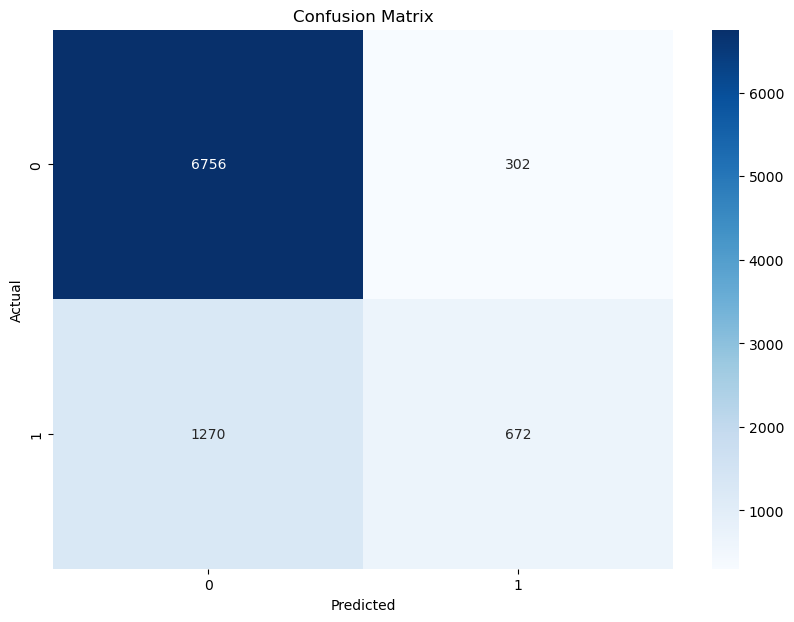

In [42]:
# confustion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# confusion matrix
cm = confusion_matrix(y_test, predictions)

# plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()